Prediction Without Wavelets

In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import pywt

In [2]:
#importing datasets
df1 = pd.read_csv("/content/drive/MyDrive/FYP/Code1/Datasets/SN_d_tot_V2.0.csv")      #sunspot dataset
df1.shape

(75147, 8)

In [3]:
df2 =pd.read_csv('/content/drive/MyDrive/FYP/Code1/Solar Flares Dataset/dataset.csv', #Solar flares dataset
				sep = ';',
				engine = 'python')
df2.shape

(7320, 15)

In [4]:
df1.columns = ['year','month', 'date','date_in_Fraction', 'daily total sunspot number', 'daily std dev','number of stations', 'definitive/provisional marker']

In [5]:
#selecting common time frame where both datasets are available - between 1st Jan 1997 and 15th Jan 2017
val = df1.loc[df1['year'] >= 1997]
val = val.loc[val['year'] < 2017]
df1 = df1.loc[ df1['year'] == 2017 ]
df1 = df1.loc[ df1['month'] == 1 ]
df1 = df1.loc[ df1['date'] <= 15 ]
df1 = pd.concat( [val,df1],  ignore_index=True)
df1

,year,month,date,date_in_Fraction,daily total sunspot number,daily std dev,number of stations,definitive/provisional marker
0,1997,1,1,1997.001,0,2.0,20,0
1,1997,1,2,1997.004,0,2.0,20,0
2,1997,1,3,1997.007,0,2.0,17,0
3,1997,1,4,1997.010,14,9.4,10,0
4,1997,1,5,1997.012,13,3.2,16,0
...,...,...,...,...,...,...,...,...
7315,2017,1,11,2017.029,0,0.0,35,0
7316,2017,1,12,2017.032,11,1.5,24,0
7317,2017,1,13,2017.034,26,2.4,25,0
7318,2017,1,14,2017.037,31,2.0,13,0


In [6]:
df1.shape

(7320, 8)

In [7]:
df1.to_csv('/content/drive/MyDrive/FYP/Code1/Trimmed Datasets/input.csv')

In [8]:
#Extracting Independent and dependent Variable

x= df1['daily total sunspot number']
y= df2['c_class_flares']

In [9]:
len(x),len(y)

(7320, 7320)

In [ ]:
# Define LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(1, 1)))
model.add(Dense(units=1))  # Output layer

In [ ]:
# Train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
model.fit(x_train, y_train, epochs=100, batch_size=32,verbose=1)

Epoch 1/100
183/183 [==============================] - 1s 5ms/step - loss: 8.1409
Epoch 2/100
183/183 [==============================] - 1s 5ms/step - loss: 8.1764
Epoch 3/100
183/183 [==============================] - 1s 5ms/step - loss: 8.1768
Epoch 4/100
183/183 [==============================] - 1s 6ms/step - loss: 8.1255
Epoch 5/100
183/183 [==============================] - 1s 4ms/step - loss: 8.1449
Epoch 6/100
183/183 [==============================] - 1s 4ms/step - loss: 8.1381
Epoch 7/100
183/183 [==============================] - 1s 4ms/step - loss: 8.1697
Epoch 8/100
183/183 [==============================] - 1s 4ms/step - loss: 8.1435
Epoch 9/100
183/183 [==============================] - 1s 4ms/step - loss: 8.1690
Epoch 10/100
183/183 [==============================] - 1s 3ms/step - loss: 8.1359
Epoch 11/100
183/183 [==============================] - 1s 4ms/step - loss: 8.1644
Epoch 12/100
183/183 [==============================] - 1s 4ms/step - loss: 8.1606
Epoch 13/100


In [ ]:
# Evaluate the machine learning model using the test dataset
loss = model.evaluate(x_test, y_test)
print("Test Loss:", loss)

46/46 [==============================] - 1s 3ms/step - loss: 7.5672
Test Loss: 7.5672125816345215


In [ ]:
#predict the test set using model
predictions = model.predict(x_test)

46/46 [==============================] - 1s 2ms/step


In [ ]:
# Calculate RMSE
rmse = math.sqrt(mean_squared_error(y_test, predictions))
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, predictions)
print("R-squared (R2) Score:", r2)

Root Mean Squared Error (RMSE): 2.7508567212390402
R-squared (R2) Score: 0.45502975208422025


In [ ]:
#saving model to Drive
model.save("/content/drive/MyDrive/FYP/Code1/lstm_without_wav.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model("/content/drive/MyDrive/FYP/Code1/lstm_without_wav.h5")

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 50)                10400     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Prediction With Wavelets

In [ ]:
x_train.shape

(5856,)

In [ ]:
y_train.shape

(5856,)

In [ ]:
#Apply DWT to 'x_train' data using the 'db2' wavelet
# Decompose the data to 11 levels with a specified mode ('smooth')

wav_coef_x=pywt.wavedec(x_train, 'db2', level=11,mode='smooth')

/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 11 is too high: all coefficients will experience boundary effects.
  warnings.warn(


In [ ]:
#Apply DWT to 'y_train' data using the 'db2' wavelet
# Decompose the data to 11 levels with a specified mode ('antireflect')
wav_coef_y=pywt.wavedec(y_train, 'db2', level=11,mode='antireflect')

In [ ]:
wav_coef_x

[array([1.53328049e+07, 3.60313657e+06, 3.35561806e+03, 3.55526827e+03,
        3.46910324e+03]),
 array([ 0.00000000e+00, -9.64550172e+05, -5.91194653e+00, -1.41093078e+02,
        -1.13686838e-13]),
 array([ 1.16415322e-10, -3.33155442e+05,  2.17096036e+01, -5.92231622e+01,
        -6.25727826e+01, -5.53788782e+01, -1.17782483e+02,  0.00000000e+00]),
 array([ 0.00000000e+00, -1.14964576e+05, -6.07966948e+01, -1.49281206e+01,
        -3.62284146e+01, -2.85490824e+01,  9.86892124e+00, -1.85848982e+01,
         1.16980389e+01, -6.59819244e+01,  1.56581967e+01, -5.22786177e+01,
        -3.44512344e+00,  2.84217094e-14]),
 array([ 2.91038305e-11, -3.96378380e+04, -3.81290255e+01, -3.01649644e+01,
         2.06700490e+01,  6.48947952e+01,  1.29976483e+02, -9.50723607e+01,
         3.31613415e+01,  6.93839692e+01, -1.10697598e+02, -6.04886527e+00,
        -1.38161847e+02, -1.25889811e+02,  8.34033603e+01,  1.27672945e+02,
        -7.49402775e+01, -2.85637300e+01, -7.51004446e+01,  6.0358939

In [ ]:
wav_coef_y

[array([ 47.0600323 ,  56.7976975 , 124.7010726 , 130.69341218,
        126.99701632]),
 array([1.77635684e-15, 1.52886484e+01, 1.81222038e+00, 5.10340487e-01,
        8.88178420e-15]),
 array([ 1.33226763e-15,  2.03670372e+01,  3.76053417e+00, -1.99939297e-01,
        -1.99851829e+00, -1.08937329e+00, -1.77515457e+00,  7.10542736e-15]),
 array([ 0.00000000e+00,  1.68385588e+01, -1.46707450e+00, -1.45538577e+00,
        -1.02905112e+00, -2.78142550e+00, -1.83771031e+00, -5.02172361e-01,
        -1.74052854e-01, -2.64416895e+00, -2.42538979e+00, -3.03360013e+00,
         3.51348461e-01,  5.32907052e-15]),
 array([ 8.88178420e-16,  8.99771551e+00, -4.17397896e+00,  3.00299131e+00,
         3.30051590e+00,  2.48337694e+00,  6.79190493e+00, -1.57325372e+00,
        -3.25336269e+00,  6.59553418e+00, -2.75651475e+00, -2.47359121e-01,
        -2.41874268e+00, -5.96192941e+00,  4.37358461e+00, -1.35171502e+00,
        -3.93261494e+00, -2.58574150e+00, -5.94046242e+00,  2.91588834e+00,
        

In [ ]:
#converting "x_train"'s wavelet coefficients to 1 D list
wav_coef_flat_x=[]
for i in wav_coef_x:
  for j in i:
    wav_coef_flat_x.append(j)

In [ ]:
#converting "y_train"'s wavelet coefficients to 1 D list
wav_coef_flat_y=[]
for i in wav_coef_y:
  for j in i:
    wav_coef_flat_y.append(j)

In [ ]:
wav_coef_flat_x

[15332804.85847714,
 3603136.5657480694,
 3355.618058091087,
 3555.2682665434368,
 3469.103240766808,
 0.0,
 -964550.1724578171,
 -5.911946532861748,
 -141.09307817602075,
 -1.1368683772161603e-13,
 1.1641532182693481e-10,
 -333155.4422499098,
 21.709603592652343,
 -59.223162174196915,
 -62.57278261372815,
 -55.37887821124761,
 -117.78248339284144,
 0.0,
 0.0,
 -114964.57619706879,
 -60.7966948275774,
 -14.928120594675676,
 -36.22841462990624,
 -28.54908241782158,
 9.868921238488213,
 -18.584898203278243,
 11.698038906641443,
 -65.98192444522263,
 15.658196662644258,
 -52.2786176726116,
 -3.445123443412683,
 2.842170943040401e-14,
 2.9103830456733704e-11,
 -39637.838043453994,
 -38.12902550985673,
 -30.164964433287736,
 20.670049019071925,
 64.89479522439252,
 129.97648349833128,
 -95.07236066714258,
 33.16134146654346,
 69.38396916455112,
 -110.69759813768388,
 -6.048865271069317,
 -138.16184658350926,
 -125.889810752737,
 83.40336032713832,
 127.67294511838756,
 -74.9402774916054,
 -

In [ ]:
wav_coef_flat_y

[47.0600322973809,
 56.797697497981375,
 124.70107259758818,
 130.69341218246495,
 126.99701631962589,
 1.7763568394002505e-15,
 15.288648437905806,
 1.8122203828849308,
 0.510340486725358,
 8.881784197001252e-15,
 1.3322676295501878e-15,
 20.367037229796637,
 3.76053417141736,
 -0.19993929654556197,
 -1.9985182933132322,
 -1.0893732915539598,
 -1.7751545728708376,
 7.105427357601002e-15,
 0.0,
 16.838558800444066,
 -1.4670744957539616,
 -1.4553857653976756,
 -1.0290511169758005,
 -2.781425498631992,
 -1.8377103068136424,
 -0.5021723607420734,
 -0.1740528543652804,
 -2.644168946036773,
 -2.4253897890550364,
 -3.0336001265632015,
 0.3513484614652693,
 5.329070518200751e-15,
 8.881784197001252e-16,
 8.997715514289002,
 -4.1739789587408005,
 3.002991314694908,
 3.3005159031000604,
 2.4833769426231607,
 6.79190493023664,
 -1.5732537242641262,
 -3.253362693287701,
 6.5955341803558385,
 -2.7565147493370494,
 -0.24735912144962136,
 -2.4187426756277572,
 -5.961929411506846,
 4.373584608950264,

In [ ]:
#printing length of flattened wavelet coefficients used for training model
len(wav_coef_flat_x)

5881

In [ ]:
len(wav_coef_flat_y)

5881

In [ ]:
# Define LSTM model
model1 = Sequential()
model1.add(LSTM(units=50, input_shape=(1, 1)))
model1.add(Dense(units=1))

In [ ]:
# Compile the model
model1.compile(optimizer='adam', loss='mean_squared_error',run_eagerly=True)

In [ ]:
#reshaping array apt for model training
wav_coef_flat_x=np.array(wav_coef_flat_x)
wav_coef_flat_x = np.reshape(wav_coef_flat_x, (wav_coef_flat_x.shape[0], 1, 1))

In [ ]:
wav_coef_flat_y=np.array(wav_coef_flat_y)
wav_coef_flat_y = np.reshape(wav_coef_flat_y, (wav_coef_flat_y.shape[0], 1, 1))

In [ ]:
#model training
model1.fit(wav_coef_flat_x, wav_coef_flat_y, epochs=100, batch_size=32,verbose=1)

Epoch 1/100
184/184 [==============================] - 6s 34ms/step - loss: 18.5406
Epoch 2/100
184/184 [==============================] - 6s 35ms/step - loss: 17.4682
Epoch 3/100
184/184 [==============================] - 6s 32ms/step - loss: 17.2535
Epoch 4/100
184/184 [==============================] - 7s 37ms/step - loss: 17.1610
Epoch 5/100
184/184 [==============================] - 6s 32ms/step - loss: 17.1010
Epoch 6/100
184/184 [==============================] - 7s 38ms/step - loss: 17.0537
Epoch 7/100
184/184 [==============================] - 6s 31ms/step - loss: 16.9935
Epoch 8/100
184/184 [==============================] - 7s 36ms/step - loss: 16.9600
Epoch 9/100
184/184 [==============================] - 6s 32ms/step - loss: 17.0441
Epoch 10/100
184/184 [==============================] - 6s 33ms/step - loss: 16.9949
Epoch 11/100
184/184 [==============================] - 6s 34ms/step - loss: 17.0076
Epoch 12/100
184/184 [==============================] - 6s 31ms/step - los

In [ ]:
#saving the model
model1.save("/content/drive/MyDrive/FYP/Code1/lstm_with_wav.h5")

In [ ]:
from tensorflow.keras.models import load_model

# Load the model
model_using_wavelets = load_model("/content/drive/MyDrive/FYP/Code1/lstm_with_wav.h5")

In [ ]:
model_using_wavelets.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50)                10400     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
x_test.shape

(1464,)

In [ ]:
y_test.shape

(1464,)

In [ ]:
#Apply DWT to 'x_test' data using the 'db2' wavelet
# Decompose the data to 11 levels with a specified mode ('smooth')
wav_coef_x=pywt.wavedec(x_test, 'db2', level=11,mode='smooth')

/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 11 is too high: all coefficients will experience boundary effects.
  warnings.warn(


In [ ]:
#Apply DWT to 'y_test' data using the 'db2' wavelet
# Decompose the data to 11 levels with a specified mode ('antireflect')
wav_coef_y=pywt.wavedec(y_test, 'db2', level=11,mode='antireflect')

In [ ]:
wav_coef_x

[array([-8.50912669e+06, -1.99553947e+06,  2.27274263e+03]),
 array([-2.32830644e-10,  5.36535527e+05,  1.13686838e-13]),
 array([-1.16415322e-10,  1.85006755e+05,  1.19095586e+02,  2.84217094e-14]),
 array([1.45519152e-11, 6.38212730e+04, 5.18666946e-01, 3.97327767e+02,
        0.00000000e+00]),
 array([ 0.00000000e+00,  2.20027752e+04, -3.59851310e+01, -1.15954288e+01,
         5.86947088e+01, -1.87717632e+01,  3.66475454e+02, -1.42108547e-14]),
 array([ 1.81898940e-12,  7.59498375e+03,  2.32493097e+00,  3.96626133e+01,
        -6.49587881e+01,  1.03464246e+01,  2.15856391e+01, -3.66136079e+01,
         2.21896442e+01,  3.51798777e+00,  2.90837790e+01, -9.68146181e+01,
         6.07597236e+01,  9.23705556e-14]),
 array([-9.09494702e-13,  2.62016072e+03, -6.98634423e+01,  1.27915431e+01,
         6.00907523e+00, -1.65185104e+02,  8.22169061e+01, -5.09276507e+00,
        -9.71919167e+01, -3.46070692e+01,  3.85208892e+01, -1.50868129e+01,
         3.15552666e+01,  6.35864313e+01, -1.675

In [ ]:
wav_coef_y

[array([1.09294408e+06, 2.56829966e+05, 4.68475804e+01]),
 array([ 0.00000000e+00, -6.87224719e+04, -1.24344979e-14]),
 array([ 7.27595761e-12, -2.37811635e+04,  8.39457174e+00,  9.76996262e-15]),
 array([ 7.27595761e-12, -8.21360547e+03,  2.33890358e+00,  2.39350145e+01,
         0.00000000e+00]),
 array([ 1.81898940e-12, -2.83765609e+03, -3.31086857e+00, -1.29958834e+00,
        -1.17561669e+00,  6.18488512e-01,  3.13220126e+01, -7.99360578e-15]),
 array([ 2.27373675e-13, -9.75464979e+02,  1.18848007e+00,  9.18054843e-01,
        -1.29794144e+00,  2.78013560e+00, -9.78037556e-01,  3.31857833e+00,
        -3.36468069e+00,  1.34433200e-01, -2.17491008e-01, -5.26049423e+00,
         4.78731529e+00, -4.10782519e-15]),
 array([ 1.13686838e-13, -3.31708703e+02, -6.44866532e+00, -4.14982587e-01,
         2.36123408e+00, -5.30719801e+00,  3.30086687e+00,  1.82220819e+00,
        -6.35043557e+00,  6.24488012e-01,  3.12600784e+00, -2.31265873e-01,
         3.25193997e+00,  3.39177865e-01, -2.7

In [ ]:
len(wav_coef_x)

12

In [ ]:
#converting "x_test"'s wavelet coefficients to 1 D list
wav_coef_flat_x=[]
for i in wav_coef_x:
  for j in i:
    wav_coef_flat_x.append(j)

In [ ]:
#converting "y_test"'s wavelet coefficients to 1 D list
wav_coef_flat_y=[]
for i in wav_coef_y:
  for j in i:
    wav_coef_flat_y.append(j)

In [ ]:
wav_coef_flat_x

[-8509126.694568884,
 -1995539.469652913,
 2272.742632247874,
 -2.3283064365386963e-10,
 536535.5267371421,
 1.1368683772161603e-13,
 -1.1641532182693481e-10,
 185006.75514690252,
 119.09558573131008,
 2.842170943040401e-14,
 1.4551915228366852e-11,
 63821.27297062392,
 0.5186669460480573,
 397.3277672185445,
 0.0,
 0.0,
 22002.775187799656,
 -35.985130958981756,
 -11.595428805911482,
 58.694708766369274,
 -18.77176317911325,
 366.47545404043063,
 -1.4210854715202004e-14,
 1.8189894035458565e-12,
 7594.983746268254,
 2.324930973601255,
 39.66261333819973,
 -64.95878809400493,
 10.346424643470655,
 21.585639077633857,
 -36.61360790220898,
 22.189644232035306,
 3.517987769365334,
 29.083778979528745,
 -96.81461806637677,
 60.75972357607783,
 9.237055564881302e-14,
 -9.094947017729282e-13,
 2620.1607183483047,
 -69.86344231856529,
 12.79154311313394,
 6.009075228288296,
 -165.18510388769772,
 82.21690613452095,
 -5.092765068143812,
 -97.19191672233342,
 -34.60706915054946,
 38.52088918173

In [ ]:
wav_coef_flat_y

[1092944.0774841534,
 256829.96591807873,
 46.84758043873097,
 0.0,
 -68722.47189099558,
 -1.2434497875801753e-14,
 7.275957614183426e-12,
 -23781.163521030463,
 8.39457173743159,
 9.769962616701378e-15,
 7.275957614183426e-12,
 -8213.605465368524,
 2.3389035835257657,
 23.935014464880055,
 0.0,
 1.8189894035458565e-12,
 -2837.656092695056,
 -3.3108685719773554,
 -1.2995883425508277,
 -1.1756166885906092,
 0.6184885115052747,
 31.322012573777585,
 -7.993605777301127e-15,
 2.2737367544323206e-13,
 -975.4649787463406,
 1.188480069412602,
 0.9180548432265807,
 -1.2979414429754357,
 2.7801356005319398,
 -0.9780375561189056,
 3.3185783344844526,
 -3.364680689613538,
 0.134433199829874,
 -0.21749100783261666,
 -5.260494225862214,
 4.787315287975838,
 -4.107825191113079e-15,
 1.1368683772161603e-13,
 -331.70870321582663,
 -6.448665316046068,
 -0.41498258693826173,
 2.3612340754412617,
 -5.307198008648578,
 3.300866869272461,
 1.822208186225296,
 -6.350435568879899,
 0.6244880123566503,
 3.126

In [ ]:
len(wav_coef_flat_x)

1490

In [ ]:
len(wav_coef_flat_y)

1490

In [ ]:
#reshaping wavelet coefficients for prediction
wav_coef_flat_x=np.array(wav_coef_flat_x)
wav_coef_flat_x = np.reshape(wav_coef_flat_x, (wav_coef_flat_x.shape[0], 1, 1))

In [ ]:
len(wav_coef_flat_y)

1490

In [ ]:
#prediction of the test set
predictions = model1.predict(wav_coef_flat_x)

47/47 [==============================] - 0s 10ms/step


In [ ]:
len(predictions)

1490

In [ ]:
# Calculate RMSE and R2 score between the input and output wavelet coefficients
from sklearn.metrics import mean_squared_error, r2_score
import math

rmse = math.sqrt(mean_squared_error(wav_coef_flat_y, predictions))
r2 = r2_score(wav_coef_flat_y, predictions)

print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Root Mean Squared Error (RMSE): 7.452190319087e-14
R-squared (R2) Score: 0.8008318135983620412


In [ ]:
#finding the size of arrays in the original wavelet coefficients list for reconstruction of the predicted wavelets
coeff_x_test_size = []
for a in wav_coef_x:
  coeff_x_test_size.append(len(a));

print(coeff_x_test_size)
len(wav_coef_x)

[3, 3, 4, 5, 8, 14, 25, 48, 94, 185, 368, 733]


12

In [ ]:
#reshaping the predicted wavelets array into original shape for resonstruction
reconstructed_output = []
index = 0
for i in range(len(coeff_x_test_size)):

  l = []
  for j in range(coeff_x_test_size[i]):
    l.append(predictions[index])
    index += 1
  reconstructed_output.append(np.array(l))


In [ ]:
rec1=np.array(reconstructed_output)

<ipython-input-122-eb7e9b6df222>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  rec1=np.array(reconstructed_output)


In [ ]:
type(rec1)

numpy.ndarray

In [ ]:
type(rec1[0])

numpy.ndarray

In [ ]:
rec2=list(rec1)

In [ ]:
type(rec2)

list

In [ ]:
type(rec2[0])

numpy.ndarray

In [ ]:
type(wav_coef_x)

list

In [ ]:
type(wav_coef_x[0])

numpy.ndarray

In [ ]:
#resonstruction of the predicted wavelet coefficients
rec_y = pywt.waverec(rec2, 'db2',mode="antireflect")

In [ ]:
#finding RMS and R2 Score between original y_test wave and resonstructed wave after prediction
print("RMSE : ",math.sqrt(mean_squared_error(y_test,rec_y)))

RMSE :  5.758722586203754e-07


In [ ]:
print("R2 Score : ",r2_score(y_test,rec_y))

R2 Score :  0.9999999999999761


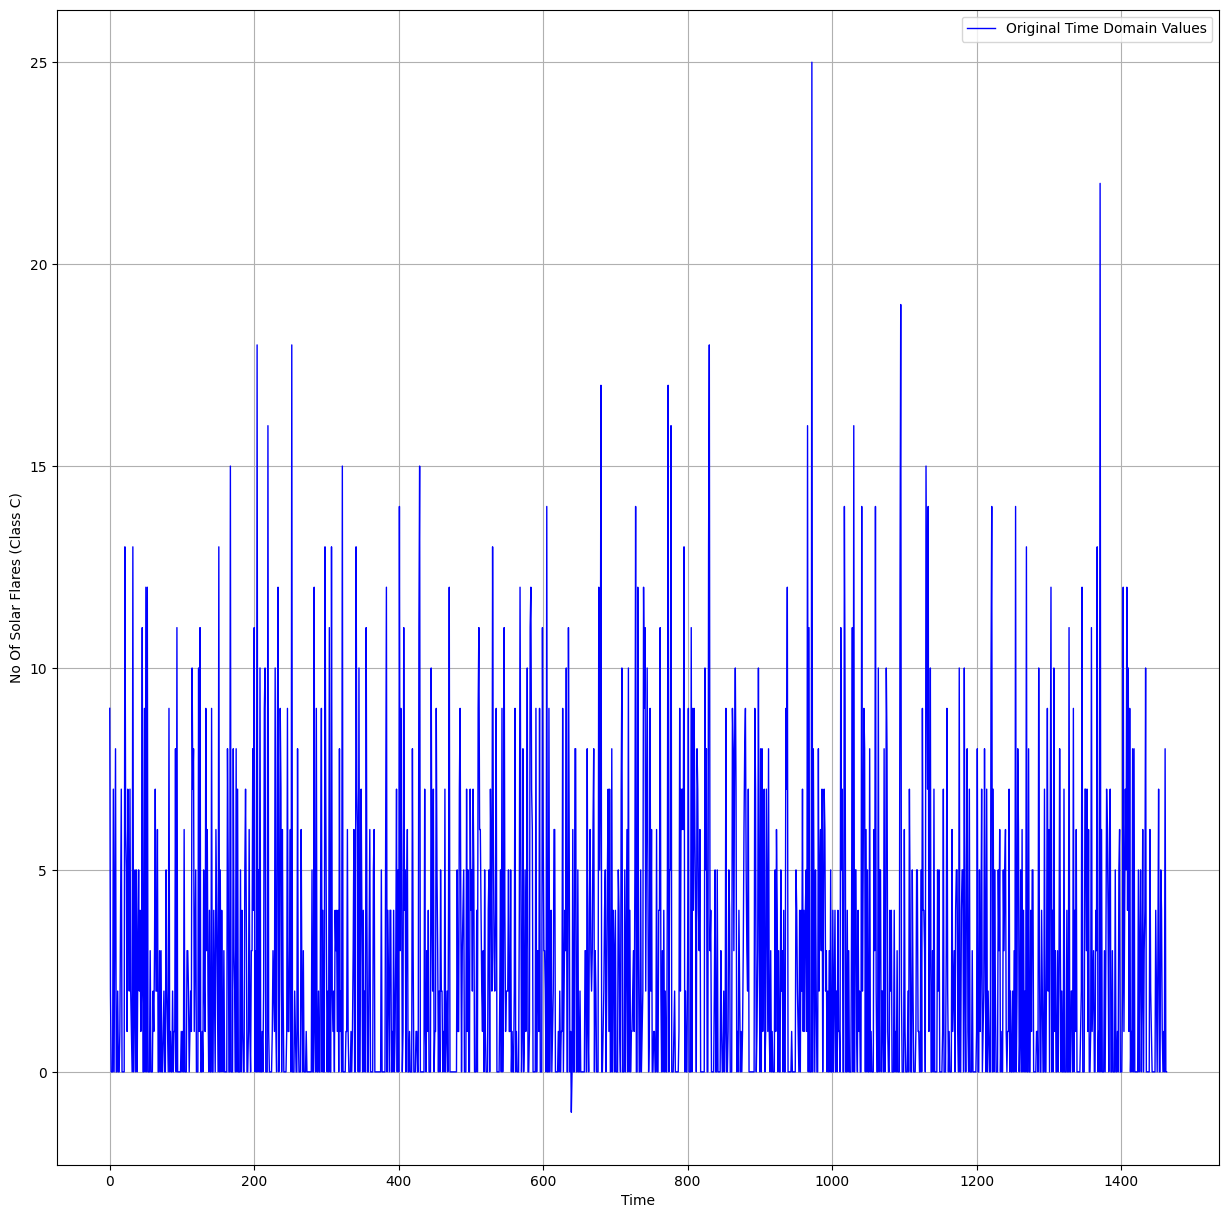

In [ ]:
plt.figure(figsize=(15,15))

plt.plot(range(len(y_test)), y_test, label='Original Time Domain Values', color='b', linewidth=1)


plt.xlabel('Time')
plt.ylabel('No Of Solar Flares (Class C)')

plt.legend()

plt.grid(True)

plt.show()


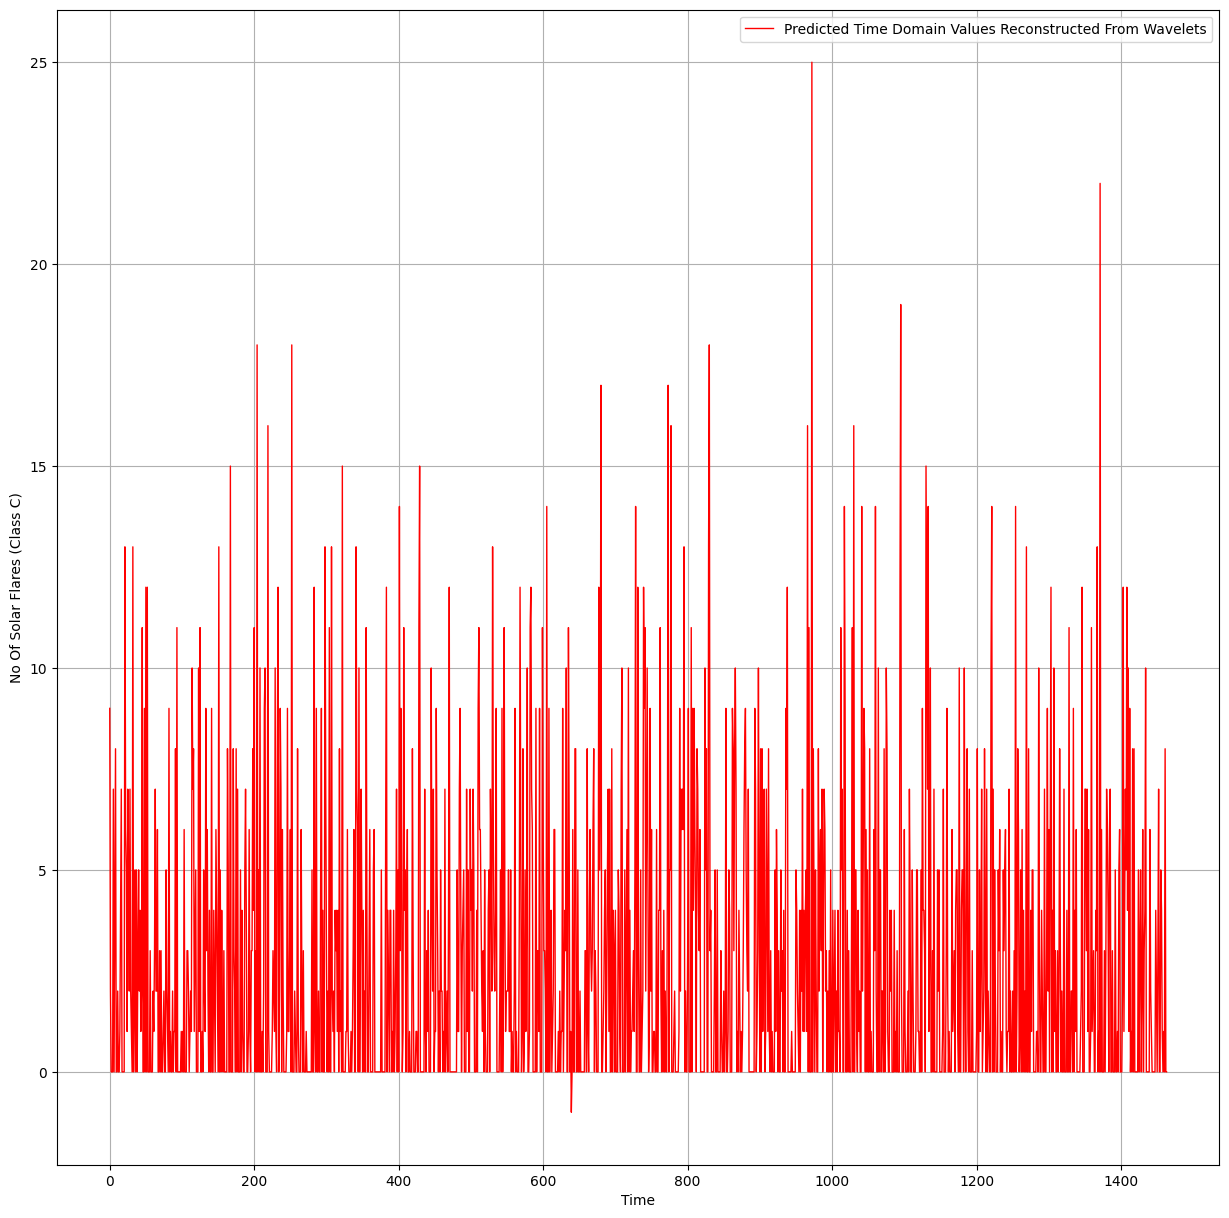

In [ ]:
plt.figure(figsize=(15,15))

plt.plot(range(len(y_test)), rec_y, label='Predicted Time Domain Values Reconstructed From Wavelets', color='r', linewidth=1)

plt.xlabel('Time')
plt.ylabel('No Of Solar Flares (Class C)')

plt.legend()

plt.grid(True)

plt.show()


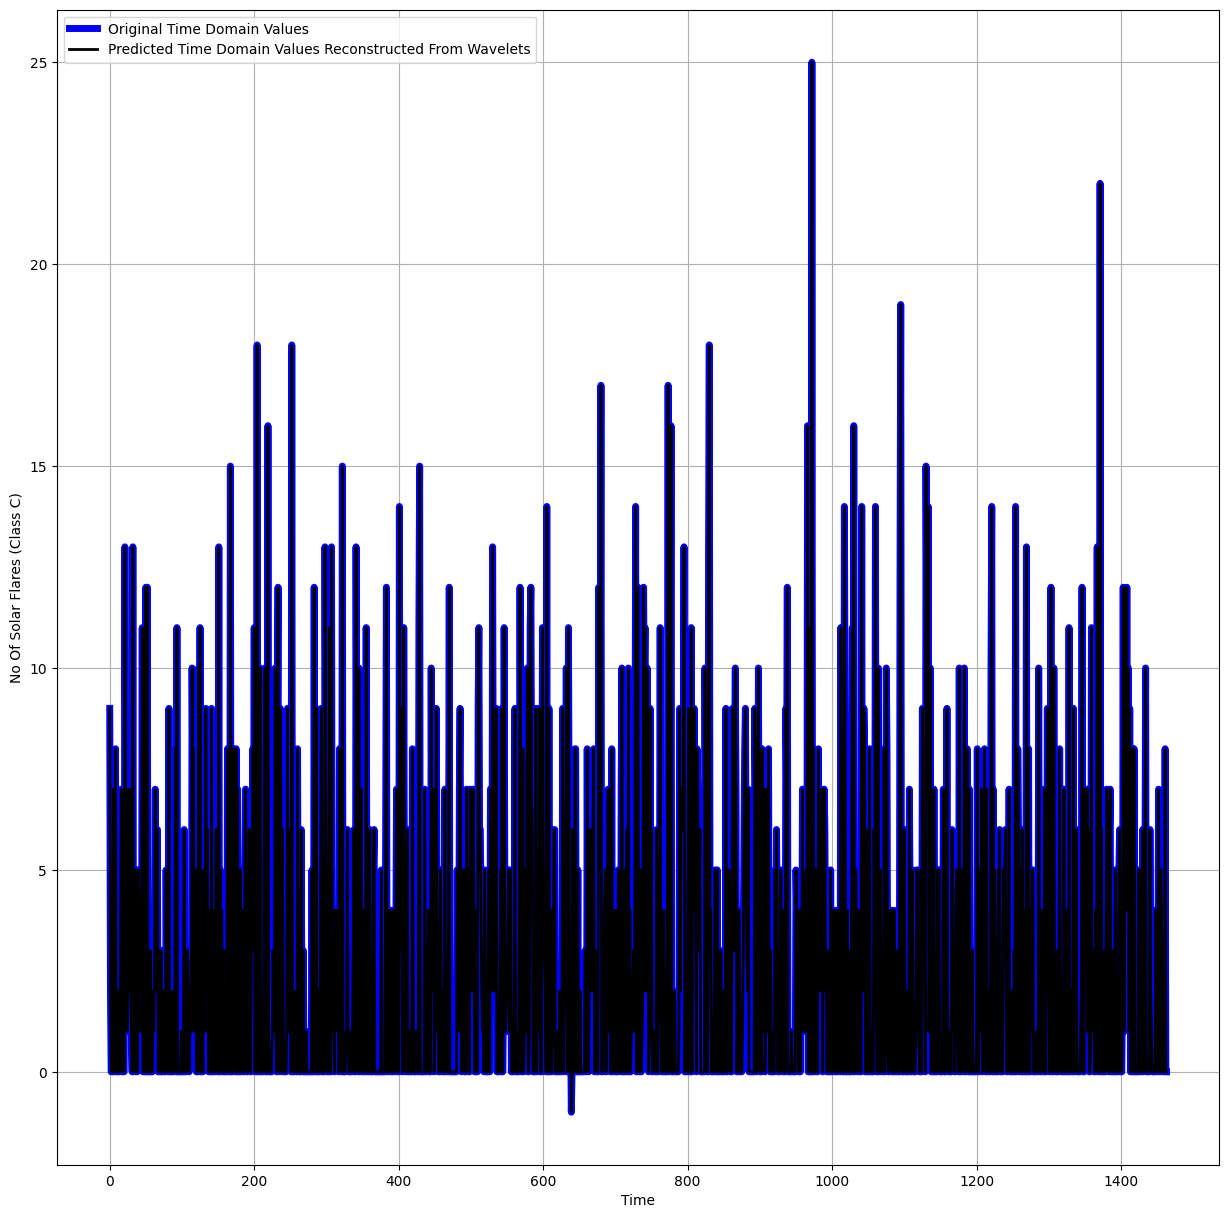

In [ ]:
plt.figure(figsize=(15,15))

plt.plot(range(len(y_test)), y_test, label='Original Time Domain Values', color='', linewidth=5)
plt.plot(range(len(y_test)), rec_y, label='Predicted Time Domain Values Reconstructed From Wavelets', color='k', linewidth=2)

plt.xlabel('Time')
plt.ylabel('No Of Solar Flares (Class C)')

plt.legend()

plt.grid(True)

plt.show()


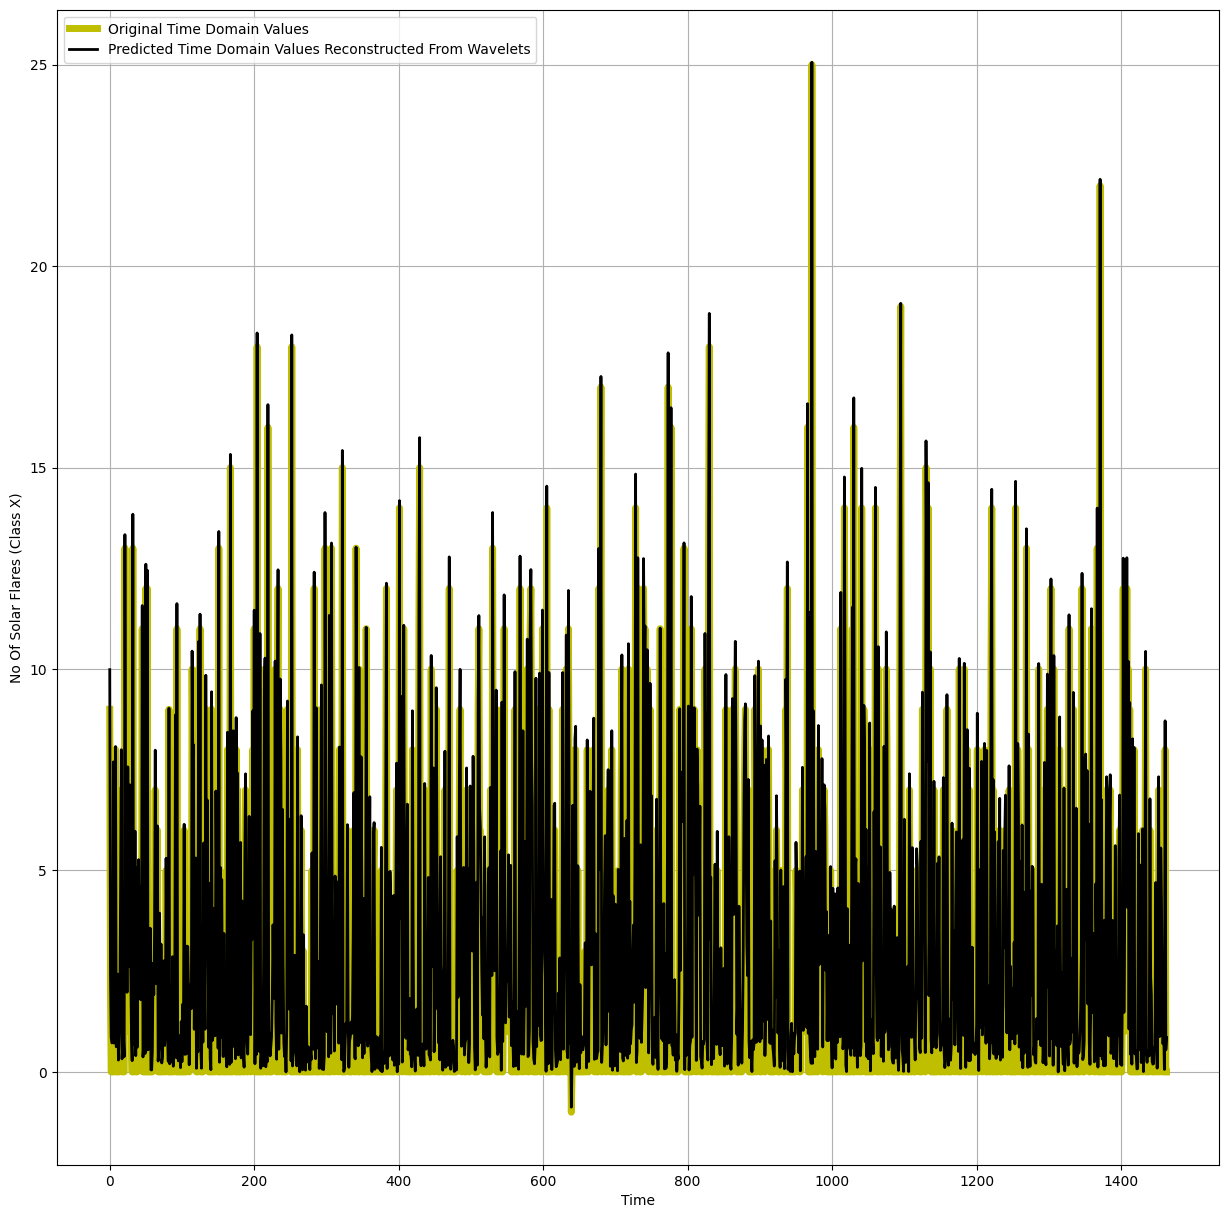